<a href="https://colab.research.google.com/github/solankinitin1210/Capstone-Project-Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **First Things First**

We will mount the drive and import libraries those are required throughout the course of our analysis.

In [ ]:
# Mount driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries for process data
import pandas as pd
import numpy as np
from numpy import math

# Import libraries for ploting data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display_html 


# **Loading Dataset**

In [ ]:
#importing the dataset in our colab envirnoment
df=pd.read_excel('/content/drive/MyDrive/Almabetter/Capstone Project 4/Online Retail.xlsx')

#  **Initial Data review**

In [ ]:
# Let's have a look first five rows of our dataset to have a lookover
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
## Let's have a look at last five rows of our dataset to have a lookover
df.tail()

In [ ]:
## Let's have a look over the number of rows and columns in our dataset
shape=df.shape
print("The data set contains {} Transactions.\nNumber of features are: {}. ".format(shape[0],(shape[1])))

In [ ]:
## Let's just inspect the dataset for datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Getting the list of all the features
print("Features of the dataset are:")
df.columns

In [ ]:
#Having a look the number of countries we have data for
#Storing the countries as a set for future use
countries=set(df['Country'].unique())
num_of_countries=df.Country.nunique()
print(countries)
print('Number of countries are:{}'.format(num_of_countries))

In [ ]:
#Getting the statistical Summary of our dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Find Unique values for Invoice,Customer,Product,Country
df[['InvoiceNo','CustomerID','StockCode','Country']].nunique()

InvoiceNo     25900
CustomerID     4372
StockCode      4070
Country          38
dtype: int64

### **From the above review on dataset we have some observations:**


1. Most Invoices appear as normal transcations with positive quantity and prices, but there are some  values in the quantity column that are addressed as negative quatity posses invoice number starting with 'C',therefore all these belong to cancelled orders.
2. Empty or Null values are in CustomerID are around 135080 that need to be treated.
3. Here we have a data for 38 different countries.
4. There are total 10624 record where the quantity is negative.
5. Average Unit price of all the items in the store is coming out to be 4.6 sterling.
6. Most expensive item in the store is Manual,whose cost is 38970 sterling and that too is a cancelled order.
7. We should further break-down the InvoiceDate column to draw some more insights.



In [ ]:
# Let's check the null values for all the columns
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.isnull().sum() * 100 / len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [ ]:
#Plot to show the percentage of missing values n the data set
plt.figure(figsize=(5, 5))

df.isnull().mean(axis=0).plot.barh()

plt.grid()
plt.xlabel("Percentage(%)")
plt.ylabel("Features")
plt.title("Percentage of missing values per columns")

## **Clean Dataset and Add Required Columns**

In [ ]:
df.duplicated().sum()

5268

In [ ]:
# remove duplicate records
display(df.shape)
df = df.drop_duplicates()
display(df.shape)

(541909, 8)

(536641, 8)

In [ ]:
df[~df['InvoiceNo'].str.startswith('C')]


In [ ]:
# Add cancellation column
df["cancellation"] = np.where(df["InvoiceNo"].str.startswith('C')==True,1,0)

In [ ]:
# find the number of cancel invoice
df[df['cancellation']==1]['InvoiceNo'].nunique()

3836

In [ ]:
# Add total price column
df["Total_sales"] = df["UnitPrice"]*df["Quantity"]

In [ ]:
# Add Month,year and hour column for EDA
df['Invoice_month']=df['InvoiceDate'].dt.to_period('M')
df['Invoice_year']=df['InvoiceDate'].dt.year
df['Invoice_hour']=df['InvoiceDate'].dt.hour
df['week_day']=df['InvoiceDate'].dt.weekday

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation,Total_sales,Invoice_month,Invoice_year,Invoice_hour,week_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30,2010-12,2010,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12,2010,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00,2010-12,2010,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12,2010,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12,2010,8,2


In [ ]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation,Total_sales,Invoice_month,Invoice_year,Invoice_hour,week_day
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,0,-11062.06,2011-08,2011,14,4
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,0,-11062.06,2011-08,2011,14,4


## **Deal with null values**

In [ ]:
# Check how many customer unique customer ID is there for each invoice 
df.groupby('InvoiceNo')['CustomerID'].nunique().reset_index().sort_values(by=['CustomerID'],ascending=False)

,InvoiceNo,CustomerID
0,536365,1
16915,571200,1
16924,571215,1
16923,571214,1
16922,571213,1
...,...,...
6097,549179,0
6098,549180,0
6099,549181,0
19280,575947,0


In [ ]:
df.dropna(subset=['CustomerID'],inplace=True)

In [ ]:
df.shape

(401604, 14)

In [ ]:
df[['InvoiceNo','CustomerID','StockCode','Country']].nunique()

InvoiceNo     22190
CustomerID     4372
StockCode      3684
Country          37
dtype: int64

In [ ]:
df['Invoice_year'].unique()

array([2010, 2011])

In [ ]:
df[['Invoice_year','Invoice_month']].groupby('Invoice_year').agg({'Invoice_month': 'unique'}).reset_index()

,Invoice_year,Invoice_month
0,2010,[2010-12]
1,2011,"[2011-01, 2011-02, 2011-03, 2011-04, 2011-05, ..."


In [ ]:
invoice_dataset=df.groupby(['InvoiceNo','CustomerID','Country','Invoice_month','Invoice_hour','week_day','cancellation']).agg({'Total_sales': 'sum','Quantity': 'sum'}).reset_index()
invoice_dataset

,InvoiceNo,CustomerID,Country,Invoice_month,Invoice_hour,week_day,cancellation,Total_sales,Quantity
0,536365,17850.0,United Kingdom,2010-12,8,2,0,139.12,40
1,536366,17850.0,United Kingdom,2010-12,8,2,0,22.20,12
2,536367,13047.0,United Kingdom,2010-12,8,2,0,278.73,83
3,536368,13047.0,United Kingdom,2010-12,8,2,0,70.05,15
4,536369,13047.0,United Kingdom,2010-12,8,2,0,17.85,3
...,...,...,...,...,...,...,...,...,...
22186,C581484,16446.0,United Kingdom,2011-12,9,4,1,-168469.60,-80995
22187,C581490,14397.0,United Kingdom,2011-12,9,4,1,-32.53,-23
22188,C581499,15498.0,United Kingdom,2011-12,10,4,1,-224.69,-1
22189,C581568,15311.0,United Kingdom,2011-12,11,4,1,-54.75,-5


In [ ]:
Top10_Country_saleswise=invoice_dataset.groupby('Country')['Total_sales'].sum().reset_index().sort_values('Total_sales',ascending=False).head(10)
Top10_Country_orderwise=invoice_dataset.groupby('Country')['InvoiceNo'].count().reset_index().sort_values('InvoiceNo',ascending=False).head(10)

df1_style = Top10_Country_saleswise.style.set_table_attributes("style='display:inline; margin-right:30px;'").set_caption("Top10_Country_saleswise")
df2_style = Top10_Country_orderwise.style.set_table_attributes("style='display:inline'").set_caption("Top10_Country_orderwise")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

,Country,Total_sales
35,United Kingdom,6747156.154000
23,Netherlands,284661.540000
10,EIRE,250001.780000
14,Germany,221509.470000
13,France,196626.050000
0,Australia,137009.770000
32,Switzerland,55739.400000
30,Spain,54756.030000
3,Belgium,40910.960000
31,Sweden,36585.410000


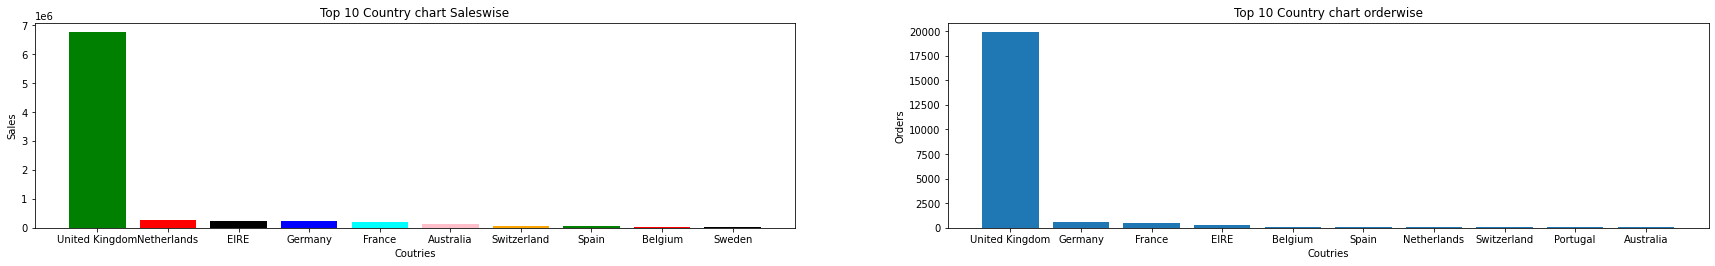

In [ ]:
plt.figure(figsize = (30,40))

plt.subplot(9,2,1) # row 1, col 2 index 1
plt.bar(Top10_Country_saleswise.Country, Top10_Country_saleswise.Total_sales,color=['green', 'red', 'black', 'blue', 'cyan','pink','orange'])
plt.title("Top 10 Country chart Saleswise")
plt.xlabel('Coutries')
plt.ylabel('Sales')
 
plt.subplot(9,2,2) # index 2
plt.bar(Top10_Country_orderwise.Country, Top10_Country_orderwise.InvoiceNo)
plt.title("Top 10 Country chart orderwise")
plt.xlabel('Coutries')
plt.ylabel('Orders')

plt.show()

In [ ]:
hour_wise_order_analysis=invoice_dataset[invoice_dataset['cancellation']==0].groupby('Invoice_hour')['InvoiceNo'].count().reset_index().sort_values('Invoice_hour')
month_wise_order_analysis=invoice_dataset[invoice_dataset['cancellation']==0].groupby('Invoice_month')['InvoiceNo'].count().reset_index().sort_values('Invoice_month')

df1_style = hour_wise_order_analysis.style.set_table_attributes("style='display:inline; margin-right:100px;'").set_caption("Top10_Country_saleswise")
df2_style = month_wise_order_analysis.style.set_table_attributes("style='display:inline;'").set_caption("Top10_Country_orderwise")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

,Invoice_hour,InvoiceNo
0,6,1
1,7,29
2,8,555
3,9,1394
4,10,2226
5,11,2277
6,12,3130
7,13,2637
8,14,2275
9,15,2038


In [ ]:
month_wise_sales_analysis=invoice_dataset.groupby('Invoice_month')['Total_sales'].sum().reset_index().sort_values('Invoice_month')
month_wise_growth_analysis=month_wise_sales_analysis.copy()
month_wise_growth_analysis['monthly_growth']=month_wise_growth_analysis['Total_sales'].pct_change()

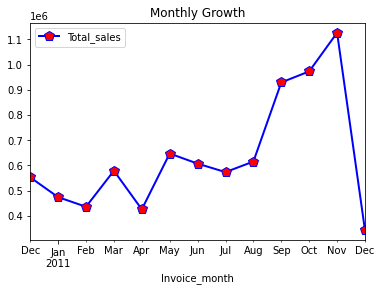

In [ ]:
month_wise_sales_analysis.plot.line(x='Invoice_month',y='Total_sales',title='Monthly Growth',color = 'b',
         marker='p', 
         markersize=10, linewidth=2,
         markerfacecolor='red')

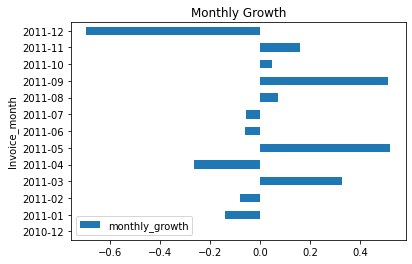

In [ ]:
month_wise_growth_analysis.plot.barh(x='Invoice_month',y='monthly_growth',title='Monthly Growth', rot=0);

In [ ]:
month_wise_quantity_analysis=invoice_dataset.groupby('Invoice_month')['Quantity'].sum().reset_index().sort_values('Invoice_month')
month_wise_quantity_analysis

,Invoice_month,Quantity
0,2010-12,295177
1,2011-01,268755
2,2011-02,262243
3,2011-03,343095
4,2011-04,277730
5,2011-05,367115
6,2011-06,356239
7,2011-07,361359
8,2011-08,385865
9,2011-09,536350


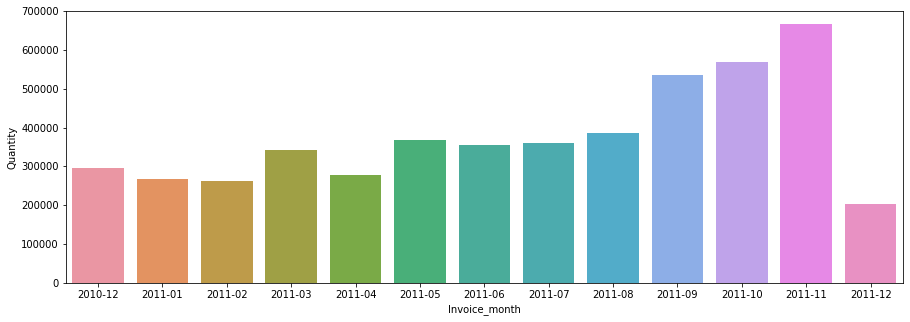

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x="Invoice_month", y="Quantity", data=month_wise_quantity_analysis)

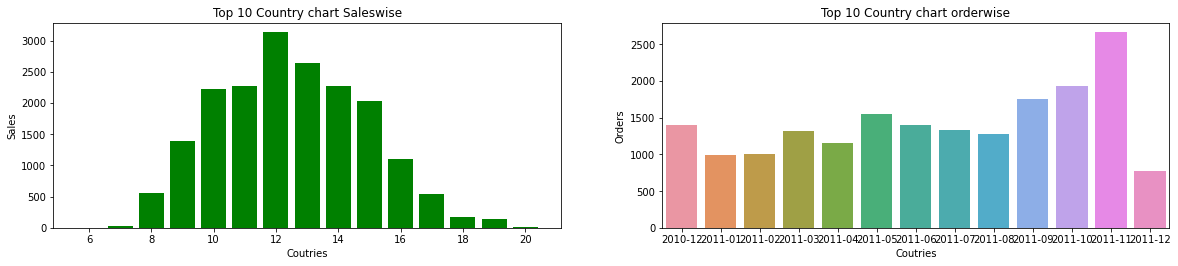

In [ ]:
plt.figure(figsize = (20,40))

plt.subplot(9,2,1) # row 1, col 2 index 1
plt.bar(hour_wise_order_analysis.Invoice_hour, hour_wise_order_analysis.InvoiceNo,color=['green'])
plt.title("Top 10 Country chart Saleswise")
plt.xlabel('Coutries')
plt.ylabel('Sales')
 
plt.subplot(9,2,2) # index 2
sns.barplot(x="Invoice_month", y="InvoiceNo", data=month_wise_order_analysis)
#plt.bar(month_wise_order_analysis.Invoice_month, month_wise_order_analysis.InvoiceNo)
plt.title("Top 10 Country chart orderwise")
plt.xlabel('Coutries')
plt.ylabel('Orders')

plt.show()

In [ ]:
invoice_dataset.groupby(['Invoice_month','week_day'])['InvoiceNo'].count().unstack()

week_day,0,1,2,3,4,6
Invoice_month,,,,,,
2010-12,263,246,373,460,202,164
2011-01,218,232,221,229,201,135
2011-02,190,234,211,235,233,99
2011-03,277,260,321,384,221,156
2011-04,224,275,268,320,196,102
2011-05,233,417,304,382,308,205
2011-06,279,272,327,413,207,209
2011-07,232,273,245,361,270,212
2011-08,212,266,363,341,213,149


In [ ]:
product_dataset=df.groupby(['StockCode']).agg({'Total_sales': 'sum','Quantity': 'sum','InvoiceNo':'count','UnitPrice':'mean','Description':'unique'}).reset_index()
product_dataset

,StockCode,Total_sales,Quantity,InvoiceNo,UnitPrice,Description
0,10002,699.550,823,49,0.850000,[INFLATABLE POLITICAL GLOBE ]
1,10080,114.410,291,21,0.411905,[GROOVY CACTUS INFLATABLE]
2,10120,40.320,192,29,0.210000,[DOGGY RUBBER]
3,10125,929.450,1225,63,0.781746,[MINI FUNKY DESIGN TAPES]
4,10133,1134.790,2363,123,0.528374,[COLOURING PENCILS BROWN TUBE]
...,...,...,...,...,...,...
3679,D,-5696.220,-1194,77,72.484545,[Discount]
3680,DOT,11906.360,16,16,744.147500,[DOTCOM POSTAGE]
3681,M,-58745.460,2944,460,338.044391,[Manual]
3682,PADS,0.003,4,4,0.000750,[PADS TO MATCH ALL CUSHIONS]


In [ ]:
product_dataset['Description']=product_dataset['Description'].apply(lambda x: x[0])
product_dataset

,StockCode,Total_sales,Quantity,InvoiceNo,UnitPrice,Description
0,10002,699.550,823,49,0.850000,INFLATABLE POLITICAL GLOBE
1,10080,114.410,291,21,0.411905,GROOVY CACTUS INFLATABLE
2,10120,40.320,192,29,0.210000,DOGGY RUBBER
3,10125,929.450,1225,63,0.781746,MINI FUNKY DESIGN TAPES
4,10133,1134.790,2363,123,0.528374,COLOURING PENCILS BROWN TUBE
...,...,...,...,...,...,...
3679,D,-5696.220,-1194,77,72.484545,Discount
3680,DOT,11906.360,16,16,744.147500,DOTCOM POSTAGE
3681,M,-58745.460,2944,460,338.044391,Manual
3682,PADS,0.003,4,4,0.000750,PADS TO MATCH ALL CUSHIONS


In [ ]:
Top10_products_saleswise=product_dataset[['Description','Total_sales']].sort_values('Total_sales',ascending=False).head(10)
Top10_products_quantitywise=product_dataset[['Description','Quantity']].sort_values('Quantity',ascending=False).head(10)

df1_style = Top10_products_saleswise.style.set_table_attributes("style='display:inline; margin-right:30px;'").set_caption("Top10_products_saleswise")
df2_style = Top10_products_quantitywise.style.set_table_attributes("style='display:inline'").set_caption("Top10_products_quantity wise")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

,Description,Total_sales
1222,REGENCY CAKESTAND 3 TIER,132567.700000
3366,WHITE HANGING HEART T-LIGHT HOLDER,93923.150000
3360,JUMBO BAG RED RETROSPOT,83056.520000
2412,PARTY BUNTING,67628.430000
3683,POSTAGE,66710.240000
2610,ASSORTED COLOUR BIRD ORNAMENT,56331.910000
1853,RABBIT NIGHT LIGHT,51042.840000
1296,PICNIC BASKET WICKER SMALL,46963.100000
2476,CHILLI LIGHTS,45915.410000
919,PAPER CHAIN KIT 50'S CHRISTMAS,41423.780000


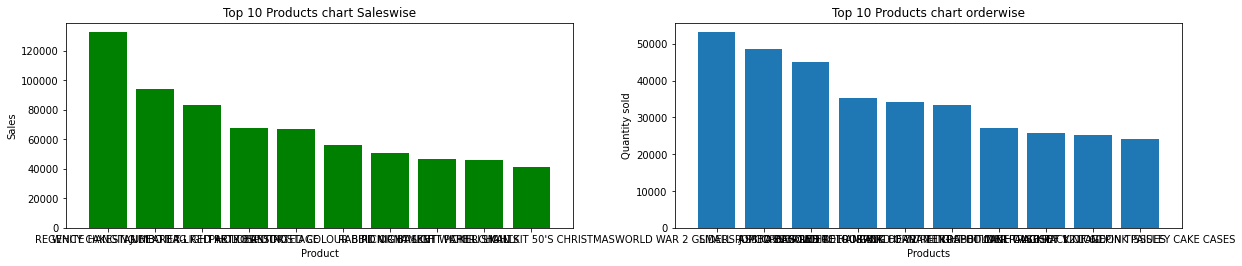

In [ ]:
plt.figure(figsize = (20,40))

plt.subplot(9,2,1) # row 1, col 2 index 1
plt.bar(Top10_products_saleswise.Description, Top10_products_saleswise.Total_sales,color=['green'])
plt.title("Top 10 Products chart Saleswise")
plt.xlabel('Product')
plt.ylabel('Sales')
 
plt.subplot(9,2,2) # index 2
plt.bar(Top10_products_quantitywise.Description, Top10_products_quantitywise.Quantity)
plt.title("Top 10 Products chart orderwise")
plt.xlabel('Products')
plt.ylabel('Quantity sold')

plt.show()

([<matplotlib.patches.Wedge at 0x7f10d02cb910>,
 [Text(-0.9560739591820118, 0.5439876695055074, 'No-TenYearCHD'),
  Text(0.9560739591820118, -0.5439876695055076, 'TenYearCHD')],
 [Text(-0.5214948868265518, 0.296720547003004, '83.53%'),
  Text(0.5214948868265518, -0.2967205470030041, '16.47%')])

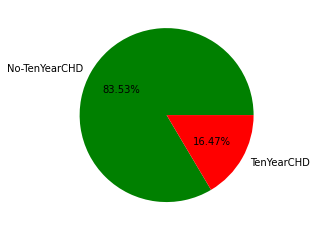

In [ ]:
cancellation=invoice_dataset.groupby('cancellation')['InvoiceNo'].count().reset_index()
cancellation

plt.pie(invoice_dataset['cancellation'].value_counts(),labels=['No-TenYearCHD','TenYearCHD'],autopct='%0.2f%%',colors=['green','red'])

In [ ]:
Cancellation_table=invoice_dataset[invoice_dataset['cancellation']==1]
Cancellation_table

,InvoiceNo,CustomerID,Country,Invoice_month,Invoice_hour,week_day,cancellation,Total_sales,Quantity
18537,C536379,14527.0,United Kingdom,2010-12,9,2,1,-27.50,-1
18538,C536383,15311.0,United Kingdom,2010-12,9,2,1,-4.65,-1
18539,C536391,17548.0,United Kingdom,2010-12,10,2,1,-141.48,-132
18540,C536506,17897.0,United Kingdom,2010-12,12,2,1,-25.50,-6
18541,C536543,17841.0,United Kingdom,2010-12,14,2,1,-3.80,-3
...,...,...,...,...,...,...,...,...,...
22186,C581484,16446.0,United Kingdom,2011-12,9,4,1,-168469.60,-80995
22187,C581490,14397.0,United Kingdom,2011-12,9,4,1,-32.53,-23
22188,C581499,15498.0,United Kingdom,2011-12,10,4,1,-224.69,-1
22189,C581568,15311.0,United Kingdom,2011-12,11,4,1,-54.75,-5


In [ ]:
x=invoice_dataset.groupby(['Invoice_month','cancellation'])['InvoiceNo'].count().unstack().reset_index()
x

cancellation,Invoice_month,0,1
0,2010-12,1400,308
1,2011-01,987,249
2,2011-02,998,204
3,2011-03,1321,298
4,2011-04,1150,235
5,2011-05,1555,294
6,2011-06,1393,314
7,2011-07,1331,262
8,2011-08,1281,263
9,2011-09,1756,322


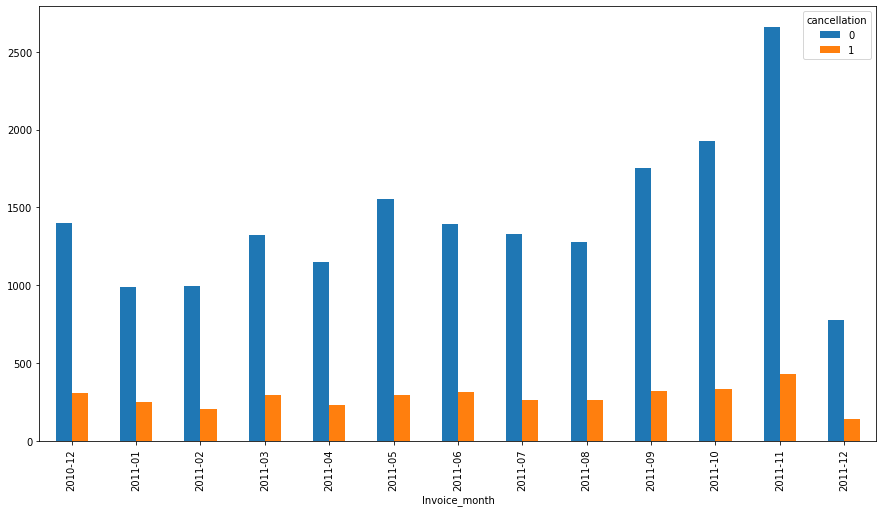

In [ ]:
x.plot(kind='bar', x='Invoice_month', figsize=(15, 8))

In [ ]:
Country_wise_cancellation_analys=Cancellation_table.groupby('Country')['InvoiceNo'].count().reset_index().sort_values('InvoiceNo',ascending=False)
Country_wise_cancellation_analys['Percentage']=(Country_wise_cancellation_analys['InvoiceNo']/Country_wise_cancellation_analys['InvoiceNo'].sum())*100
Country_wise_cancellation_analys.head()

,Country,InvoiceNo,Percentage
27,United Kingdom,3208,87.794198
11,Germany,146,3.995621
10,France,69,1.888342
7,EIRE,59,1.614669
2,Belgium,21,0.574713


In [ ]:
customer_table=invoice_dataset.groupby('CustomerID').agg({'Total_sales':'sum','cancellation':'sum','InvoiceNo':'count'}).reset_index()
customer_table

,CustomerID,Total_sales,cancellation,InvoiceNo
0,12346.0,0.00,1,2
1,12347.0,4310.00,0,7
2,12348.0,1797.24,0,4
3,12349.0,1757.55,0,1
4,12350.0,334.40,0,1
...,...,...,...,...
4367,18280.0,180.60,0,1
4368,18281.0,80.82,0,1
4369,18282.0,176.60,1,3
4370,18283.0,2045.53,0,16


In [ ]:
 max=customer_table['InvoiceDate'].max()

NameError: ignored

In [ ]:
customer_table['Recency']=(max-customer_table['InvoiceDate']).astype('timedelta64[D]')

In [ ]:
customer_table

In [ ]:
customer_table[customer_table['Total_sales']<0]

In [ ]:
customer_table.describe()